In [1]:
import uncertainties as unc
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
h = np.array([10, 10, 15, 15, 20, 20])
x_delta = np.array([
           unc.ufloat(0.045 - 0.002, 0.002), unc.ufloat(0.141 - 0.045, 0.010),
           # h = 15 cm
           unc.ufloat(0.068, 0.002), unc.ufloat(0.227 - 0.068, 0.008),
           # h = 20 cm,
           unc.ufloat(0.101 - 0.002, 0.018), unc.ufloat(0.302 - 0.101, 0.060)])
t_delta = np.array([
           unc.ufloat(0.250,0.030), unc.ufloat(0.250,0.030),
           # h = 15 cm
           unc.ufloat(0.250,0.030), unc.ufloat(0.250,0.030),
           # h = 20 cm
           unc.ufloat(0.250,0.030), unc.ufloat(0.250,0.030)])
v0 = np.array([
      unc.ufloat(0.100,0.020), unc.ufloat(0.260,0.020),
      # h = 15 cm
      unc.ufloat(0.068,0.030), unc.ufloat(0.467,0.030),
      # h = 20 cm,
      unc.ufloat(0.133,0.053), unc.ufloat(0.620,0.080)])
a = np.array([
     unc.ufloat(0.823,0.070), unc.ufloat(0.858,0.099),
     # h = 15 cm
     unc.ufloat(1.690,0.350), unc.ufloat(1.436, 0.094),
     # h = 20 cm
     unc.ufloat(1.932, 0.160), unc.ufloat(1.990, 0.110)])


In [3]:
xnom = np.array([x.nominal_value for x in x_delta])
x_unc = np.array([x.std_dev for x in x_delta])
tnom = np.array([t.nominal_value for t in t_delta])
t_unc = np.array([t.std_dev for t in t_delta])
vnom = np.array([v.nominal_value for v in v0])
v_unc = np.array([v.std_dev for v in v0])
anom = np.array([a.nominal_value for a in a])
a_unc = np.array([a.std_dev for a in a])

0.49978978371771476+/-0.03714505783403132

0.9477993188357252+/-0.11543034419528482

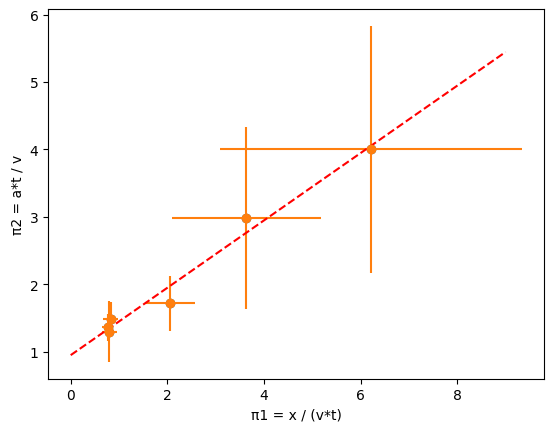

In [8]:
pi1 = a*t_delta / v0
pi2 = x_delta / (v0*t_delta)

pi1_nom = np.array([x.nominal_value for x in pi1])
pi1_unc = np.array([x.std_dev for x in pi1])
pi2_nom = np.array([x.nominal_value for x in pi2])
pi2_unc = np.array([x.std_dev for x in pi2])

parameters, covariance = curve_fit(lambda x, a, b: a*x + b, pi1_nom, pi2_nom)

display(unc.ufloat(parameters[0], np.sqrt(covariance[0,0])))
display(unc.ufloat(parameters[1], np.sqrt(covariance[1,1])))

x_values = np.linspace(0,9,100)

plt.figure()

plt.plot(pi1_nom,pi2_nom, 'o')
plt.errorbar(pi1_nom, pi2_nom, xerr=pi1_unc, yerr=pi2_unc, fmt='o')

(plt.plot(x_values, parameters[0]*x_values + parameters[1], 'r--'))

plt.xlabel("π1 = x / (v*t)")
plt.ylabel("π2 = a*t / v")

plt.show()